# Policy and Economic Growth in the Middle East

#### AMENA Center Data Science Team:  Elda Pere

This project revolves around creating interactive data visualizations of regressions using Python on Jupyter Notebooks and showing the correlation between performance variables such as GDP and explanatory variables such as global innovation ranking. The goal of this project is to create a tool for academics and policymakers to view the counterfactuals of certain decisions. 

In [1]:
#Import preliminary packages

import numpy as np
import pandas as pd

import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
import plotly.express as px

import plotly.graph_objs as go
import plotly.figure_factory as ff

In [2]:
#Uncomment the following line if xlrd has already been installed
#pip install xlrd

### Cleaning dataframe of explanatory variables

**Getting the data**: The data imported below is sourced from the Fraser Institute's Economic Freedom of the World 2020 Annual Report at: https://www.fraserinstitute.org/studies/economic-freedom. We will focus our efforts on data prior to 2018 in order to account for confounding factors such as the ramifications of the COVID-19 pandemic. 

In [3]:
#Importing and cleaning the first data set.

initial_file = pd.read_excel('efw-2020-master-index-data-for-researchers.xlsx', skiprows = 4, usecols = 'B:BU')
initial_file.head()

,Year,ISO_Code,Countries,Economic Freedom Summary Index,Rank,Quartile,Government consumption,data,Transfers and subsidies,data.1,...,Conscription,Labor market regulations,Administrative requirements,Regulatory Burden,Starting a business,Impartial Public Administration,Licensing restrictions,Tax compliance,Business regulations,Regulation
0,2018.0,ALB,Albania,7.80,26.0,1.0,8.155882,12.270000,6.738420,12.470000,...,10.0,6.717929,5.651538,6.666667,9.742477,5.396,5.621940,7.175250,6.708979,7.721734
1,2018.0,DZA,Algeria,4.97,157.0,4.0,3.220588,29.050000,7.817129,8.511137,...,3.0,5.645397,4.215154,2.444444,9.305002,3.906,8.771111,7.029528,5.945207,5.563704
2,2018.0,AGO,Angola,4.75,159.0,4.0,7.698695,13.824437,9.623978,1.880000,...,0.0,5.338186,2.937894,2.444444,8.730805,5.044,7.916416,6.782923,5.642747,5.386200
3,2018.0,ARG,Argentina,5.78,144.0,4.0,5.938235,19.810000,6.307902,14.050000,...,10.0,5.119549,2.714233,6.666667,9.579288,7.202,5.726521,6.508295,6.399500,5.757401
4,2018.0,ARM,Armenia,7.92,18.0,1.0,7.717647,13.760000,7.711172,8.900000,...,0.0,6.461113,5.170406,6.000000,9.863530,6.298,9.302574,7.040738,7.279208,7.762321


In [4]:
#Understanding the shape of the dataframe. 

print('The number of rows is: ' + str(initial_file.shape[0]))
print('The number of columns is: ' + str(initial_file.shape[1]))

The number of rows is: 4051
The number of columns is: 72


In [5]:
#Listing the column values. 

initial_file.columns

Index(['Year', 'ISO_Code', 'Countries', 'Economic Freedom Summary Index',
       'Rank', 'Quartile', 'Government consumption', 'data',
       'Transfers and subsidies', 'data.1', 'Government investment', 'data.2',
       'Top marginal income tax rate', 'data.3',
       'Top marginal income and payroll tax rate', 'data.4',
       'Top marginal tax rate', 'State ownership of assets',
       'Size of Government', 'Judicial independence', 'Impartial courts',
       'Protection of property rights',
       'Military interference in rule of law and politics',
       'Integrity of the legal system', 'Legal enforcement of contracts',
       'Regulatory restrictions on the sale of real property',
       'Reliability of police', 'Gender Legal Rights Adjustment',
       'Legal System & Property Rights', 'Money growth', 'data.5',
       'Standard deviation of inflation', 'data.6',
       'Inflation: Most recent year', 'data.7',
       ' Freedom to own foreign currency bank accounts', 'Sound Money',

In [6]:
#Checking the percent of null values in each column and displaying the column names with over 40% null values. 
null_lst = []
for i in initial_file.columns:
    null_percents =  initial_file[i].isnull().sum()/initial_file.shape[0]
    if null_percents > 0.3:
        null_lst += [i]

In [7]:
#Dropping the first set of columns that have mostly null values and that appear irrelevant to this study. 

dropped_columns_df = initial_file.drop(columns = [i for i in initial_file.columns if i.startswith('data')] + null_lst 
                                       + ['Mandated cost of worker dismissal'])

In [8]:
#Listing the datatypes by column.

pd.set_option('display.max_rows', None)
dtypes = pd.DataFrame(dropped_columns_df.dtypes)

In [9]:
# List the columns that are not floats. ISO_Code and Countries are expected to be non numerical. 

dtype = dtypes[dtypes[0] != 'float64']
dtype

,0
ISO_Code,object
Countries,object


In [10]:
#Specify the year to be 2018.

explanatory = dropped_columns_df[dropped_columns_df['Year'] == 2018]

In [11]:
#Verify that every line is a unique country. 
explanatory.shape[0] == len(explanatory['Countries'].unique())

True

### Cleaning dataframe of performance variables

The performance columns include GDP, economic growth rate, prosperity index and social capital index. Further into the analysis, we will determine which of these is the most explanable by our model.

**Getting the data**: The data imported below is sourced from the AMENA Center at UC Berkeley. We will focus our efforts on data prior to 2018 in order to account for confounding factors such as the ramifications of the COVID-19 pandemic. 
Note for later: need to verify that this data is from 2018. 

In [12]:
#Importing and cleaning the second data set that contains the performance variables. 

second_file = pd.read_excel('AMENA-Data-20190305.xlsx')
second_file.head()

,Country,Region,Muslim Population,Muslim percentage (%) of total population,WB Ease of Doing Business,GEDI's Global Entrepreneurship Index Ranking,Global Innovation Index Ranking,WEF's Global Competitive Index Ranking,Transparency International Corruption Perception Index SCORE,Voice and Accountability,...,"Quality of the Educational system: Primary, secondary, tertiary",Literacy Rate,Female Literacy Rate,% of individuals enrolled in tertiary education,GDP per capita (2016 current US$),Economic growth rate (2016 GDP Growth annual%),"Inflation, consumer prices (annual %)","Unemployment, total (% of total labor force)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","LFPR, female (% of female population ages 15+)"
0,Albania,Europe,1792216,99.7,65,24.2,28.86,4.2,38,51.72,...,95,97.6,96.9,58.1,4125.0,3.4,1.3,15.0,33.6,47
1,Algeria,North Africa,40559748,99.0,166,24.7,24.34,4.1,33,23.65,...,93,80.2,73.1,36.9,3916.9,3.3,6.4,11.7,29.1,15
2,Azerbaijan,Eurasia,9652592,97.0,57,30.5,30.58,4.7,31,7.39,...,76,99.8,99.7,22.0,3878.7,-3.1,4.2,5.1,14.8,63
3,Bahrain,Middle East,991892,70.0,66,45.1,34.67,4.5,36,8.37,...,44,95.7,93.5,43.3,22579.1,NaN,2.8,1.2,6.0,44
4,Bangladesh,South Asia,140623481,89.0,177,11.8,23.72,3.9,28,31.03,...,142,72.8,69.9,13.4,1358.8,7.1,5.5,4.0,10.2,33


In [13]:
#Understanding the shape of the dataframe. 

print('The number of rows is: ' + str(second_file.shape[0]))
print('The number of columns is: ' + str(second_file.shape[1]))

The number of rows is: 36
The number of columns is: 30


In [14]:
#Checking the percent of null values in each column and dropping the columns with over 40% null values. 

null_lst_2 = []
for i in second_file.columns:
    null_percents_2 =  second_file[i].isnull().sum()/second_file.shape[0]
    if null_percents_2 > 0.4:
        null_lst_2 += [i]
        
second_file_dropped = second_file.drop(columns = null_lst_2)

In [15]:
#Verify that every line is a unique country. 
second_file_dropped.shape[0] == len(second_file_dropped['Country'].unique())

True

### Combining and cleaning datasets for Middle Eastern data

In [16]:
#Join the two datasets with the country as the common column.

merged_data = explanatory.merge(second_file_dropped, left_on='Countries', right_on='Country').drop(columns = 'Country')
merged_data.shape

(29, 73)

In [17]:
pd.set_option('display.max_columns', None)

merged_data.head()

,Year,ISO_Code,Countries,Economic Freedom Summary Index,Rank,Quartile,Government consumption,Transfers and subsidies,Government investment,Top marginal income tax rate,Top marginal tax rate,State ownership of assets,Size of Government,Judicial independence,Impartial courts,Protection of property rights,Military interference in rule of law and politics,Integrity of the legal system,Legal enforcement of contracts,Regulatory restrictions on the sale of real property,Reliability of police,Gender Legal Rights Adjustment,Legal System & Property Rights,Money growth,Standard deviation of inflation,Inflation: Most recent year,Freedom to own foreign currency bank accounts,Sound Money,Revenue from trade taxes (% of trade sector),Mean tariff rate,Tariffs,Black market exchange rates,Financial Openness,Capital controls,Controls of the movement of capital and people,Freedom to Trade Internationally,Ownership of banks,Private sector credit,Interest rate controls/negative real interest rates),Credit market regulations,Hours Regulations,Conscription,Labor market regulations,Impartial Public Administration,Regulation,Region,Muslim Population,Muslim percentage (%) of total population,WB Ease of Doing Business,GEDI's Global Entrepreneurship Index Ranking,Global Innovation Index Ranking,WEF's Global Competitive Index Ranking,Transparency International Corruption Perception Index SCORE,Voice and Accountability,Political Stability and Absence of Violence,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption,Prosperity Index Ranking (Legatum Inst.),Social Capital Index (Legatum Inst.),Protection of Intellectual property rights ranking,Protection of physical property,"Quality of the Educational system: Primary, secondary, tertiary",Literacy Rate,Female Literacy Rate,% of individuals enrolled in tertiary education,GDP per capita (2016 current US$),Economic growth rate (2016 GDP Growth annual%),"Inflation, consumer prices (annual %)","Unemployment, total (% of total labor force)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","LFPR, female (% of female population ages 15+)"
0,2018.0,ALB,Albania,7.80,26.0,1.0,8.155882,6.738420,7.995416,9.0,8.0,9.538,8.085544,3.564791,3.651625,4.935262,8.3,5.707933,3.913506,6.715384,5.607842,0.9524,5.173414,9.957235,9.738327,9.594400,10.0,9.822491,9.666667,9.28,9.015289,10.0,4.164419,4.615385,5.692242,8.203462,10.0,9.214878,10.0,9.738293,8.0,10.0,6.717929,5.396,7.721734,Europe,1792216,99.7,65,24.2,28.86,4.2,38,51.72,55.24,52.40,60.58,39.42,41.35,75.0,119.0,118.0,118.0,95,97.6,96.9,58.1,4125.0,3.4,1.3,15.0,33.6,47
1,2018.0,DZA,Algeria,4.97,157.0,4.0,3.220588,7.817129,4.606816,7.0,4.5,1.064,4.241707,3.710710,4.108493,5.487307,4.2,4.694287,4.392092,6.626692,6.347414,0.8333,4.533636,9.596447,7.944070,9.146020,5.0,7.921634,8.480000,6.22,6.872533,0.0,1.657258,0.000000,0.921172,2.578038,0.0,5.301526,10.0,5.100509,6.0,3.0,5.645397,3.906,5.563704,North Africa,40559748,99.0,166,24.7,24.34,4.1,33,23.65,11.43,35.10,10.10,19.23,27.40,116.0,134.0,106.0,106.0,93,80.2,73.1,36.9,3916.9,3.3,6.4,11.7,29.1,15
2,2018.0,AZE,Azerbaijan,6.37,112.0,3.0,7.044118,7.937330,1.847347,9.0,6.5,2.796,5.224959,3.115288,4.376142,5.863892,5.0,4.489637,7.252962,7.613975,7.603726,0.6667,4.720472,8.935912,5.715807,9.615624,5.0,7.316836,9.044469,8.20,7.977490,10.0,4.663217,4.615385,3.572245,7.241730,5.0,10.000000,10.0,8.333333,6.0,1.0,6.543374,2.222,7.335152,Eurasia,9652592,97.0,57,30.5,30.58,4.7,31,7.39,17.62,49.04,43.75,31.73,17.79,106.0,137.0,115.0,115.0,76,99.8,99.7,22.0,3878.7,-3.1,4.2,5.1,14.8,63
3,2018.0,BHR,Bahrain,7.16,70.0,2.0,4.120588,8.032698,10.000000,10.0,10.0,0.970,6.624657,4.666556,5.115325,6.325623,5.0,5.369217,4.785814,9.403392,8.950928,0.5227,4.721974,9.537447,7.583175,9.583038,10.0,9.175915,9.480000,8.94,7.918667,10.0,10.000000,6.153846,5.642742,7.576066,10.0,2.827501,10.0,7.609167,8.0,10.0,7.899158,2.084,7.689252,Middle East,991892,70.0,66,45.1,34.67,4.5,36,8.37,18.10,65.87,72.1

In [18]:
#Drop Libya because too many missing values. 

merged_data = merged_data.drop(index = 14)

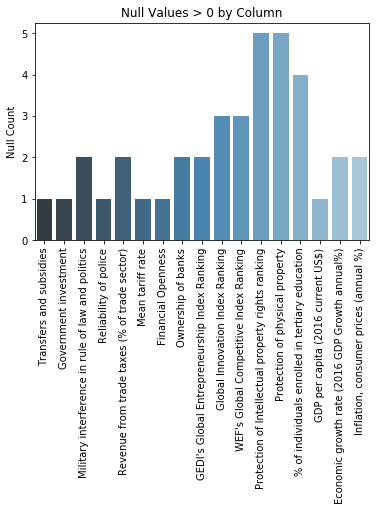

In [19]:
#A more robust approach to missing data. 

#Visualizing missing values with a bar plot colored by value.

#Creating the dataframe of null value counts for each column.
null_vals = pd.DataFrame(merged_data.isnull().sum())
null_vals2 = null_vals[null_vals[0] > 0]

#Plotting the bar chart of null values > 0.
bar1 = sns.barplot(x = null_vals2.index, y = null_vals2[0], data = null_vals2, palette="Blues_d");
bar1.set_title('Null Values > 0 by Column');
bar1.set_ylabel("Null Count");
plt.setp(bar1.get_xticklabels(), rotation=90);


In [20]:
#Replace the few remaining missing values with the column mean so it does not negatively effect the results.

for j in [i for i in merged_data.columns if i not in ['Country', 'Region', 'Countries', 'Year', 'ISO_Code']]:
    merged_data[j] = merged_data[j].fillna((merged_data[j].mean()))

#Print remaining null values to be sure they are taken care of:
merged_data.isnull().sum().sum()

0

### Exploratory Data Analysis

Below we consider the effect of every variable against the GDP per capita calculated in 2018. A high correlation is assumed to be above 0.5 and below -0.5. We save the variables with the highest correlations in the list "high_corr_variables". 

In [21]:
#Incorporate better later:GDP per capita (2018, $)

GDP_list = [5284.380184, 4114.715061, 4739.84171, 23991.05668, 1698.350394, 820.1607938, 726.1498811, 983.3094922,
            3893.846425, 4241.788782, 9812.601405, 33994.38192, 8024.803271, 7877.122251, 11373.233, 900.1101645, 
            3222.200634, 571.5269922, 16414.88802, 1482.305667, 68793.78444, 23338.96346, 1465.591006, 533.9911843,
            826.6215305, 3438.789089, 9370.176355, 43839.35635]

merged_data['GDP per Capita (2018 USD)'] = GDP_list

In [22]:
#Find the highest correlations of merged_data.iloc[:, 3:-1] data against GDP per capita (2018, $)
corr_lst = []

for i in merged_data.iloc[:, 3:-1].drop(columns = ['Region', 'GDP per capita (2016 current US$)']).columns:
    corr_lst += [(i, merged_data['GDP per Capita (2018 USD)'].corr(merged_data[i]))]

#Retrieve the variables with the highest correlations. 
high_corr_variables = []

for pair in corr_lst:
    if abs(pair[1]) > 0.5:
        high_corr_variables += [pair[0]]

In [23]:
#Create a new dataframe with the variables above. 
high_corr_df = pd.DataFrame()
high_corr_df['GDP per Capita (2018 USD)'] = merged_data['GDP per Capita (2018 USD)']
high_corr_df['Region'] = merged_data['Region']
high_corr_df['Countries'] = merged_data['Countries']

for i in high_corr_variables:
    high_corr_df[i] = merged_data[i]

high_corr_df.head()

,GDP per Capita (2018 USD),Region,Countries,Impartial courts,Regulatory restrictions on the sale of real property,Reliability of police,Freedom to own foreign currency bank accounts,Mean tariff rate,Financial Openness,Capital controls,WB Ease of Doing Business,GEDI's Global Entrepreneurship Index Ranking,Global Innovation Index Ranking,WEF's Global Competitive Index Ranking,Transparency International Corruption Perception Index SCORE,Political Stability and Absence of Violence,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption,Prosperity Index Ranking (Legatum Inst.),Protection of Intellectual property rights ranking,Protection of physical property,"Quality of the Educational system: Primary, secondary, tertiary"
0,5284.380184,Europe,Albania,3.651625,6.715384,5.607842,10.0,9.28,4.164419,4.615385,65,24.2,28.86,4.2,38,55.24,52.40,60.58,39.42,41.35,75.0,118.0,118.0,95
1,4114.715061,North Africa,Algeria,4.108493,6.626692,6.347414,5.0,6.22,1.657258,0.000000,166,24.7,24.34,4.1,33,11.43,35.10,10.10,19.23,27.40,116.0,106.0,106.0,93
2,4739.841710,Eurasia,Azerbaijan,4.376142,7.613975,7.603726,5.0,8.20,4.663217,4.615385,57,30.5,30.58,4.7,31,17.62,49.04,43.75,31.73,17.79,106.0,115.0,115.0,76
3,23991.056680,Middle East,Bahrain,5.115325,9.403392,8.950928,10.0,8.94,10.000000,6.153846,66,45.1,34.67,4.5,36,18.10,65.87,72.12,66.35,56.25,62.0,42.0,42.0,44
4,1698.350394,South Asia,Bangladesh,3.720289,2.666150,4.182017,0.0,7.20,1.657258,0.000000,177,11.8,23.72,3.9,28,10.48,25.48,22.12,30.77,21.15,111.0,125.0,125.0,142


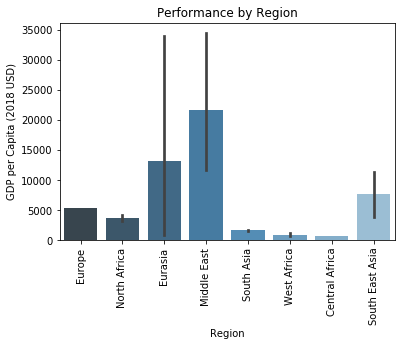

In [24]:
#Visualize The average GDP per capita by region.

bar2 = sns.barplot(x = 'Region', y = 'GDP per Capita (2018 USD)', data = high_corr_df, palette="Blues_d")
bar2.set_title('Performance by Region');
plt.setp(bar2.get_xticklabels(), rotation=90);

Below we compare the values of the countries with the highest GDP per capita to the rest of the countries. The purpose is to determine which features might be more effective in increasing GDP per capita. According to the analysis below, the most useful features are **'Quality of the Educational system: Primary, secondary, tertiary', 'WB Ease of Doing Business', 'Government Effectiveness' and 'Rule of Law'**. 

In [50]:
#Compare the features of the countries with the 5 highest GDP per capita values to the average of the rest. 

top_five = high_corr_df.sort_values('GDP per Capita (2018 USD)', ascending = False).iloc[:5, :]

averages = pd.concat([high_corr_df, top_five, top_five]).drop_duplicates(keep=False)

avges = averages.mean().tolist()
avges.insert(1, 'NA')
avges.insert(2, 'Mean')

comparison = top_five.append(pd.DataFrame([avges], columns = top_five.columns))
comparison

,GDP per Capita (2018 USD),Region,Countries,Impartial courts,Regulatory restrictions on the sale of real property,Reliability of police,Freedom to own foreign currency bank accounts,Mean tariff rate,Financial Openness,Capital controls,WB Ease of Doing Business,GEDI's Global Entrepreneurship Index Ranking,Global Innovation Index Ranking,WEF's Global Competitive Index Ranking,Transparency International Corruption Perception Index SCORE,Political Stability and Absence of Violence,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption,Prosperity Index Ranking (Legatum Inst.),Protection of Intellectual property rights ranking,Protection of physical property,"Quality of the Educational system: Primary, secondary, tertiary"
21,68793.784440,Middle East,Qatar,6.239616,9.882487,7.920665,10.0,9.040000,10.000000,4.615385,83.000000,55.00000,37.900000,5.100000,63.000000,76.190000,74.520000,74.040000,79.330000,79.810000,47.000000,22.000000,22.000000,31.0
28,43839.356350,Middle East,United Arab Emirates,6.652854,9.905909,8.608658,10.0,9.040000,10.000000,5.384615,21.000000,53.50000,43.240000,5.300000,71.000000,60.950000,90.870000,80.290000,79.810000,88.460000,39.000000,21.000000,21.000000,40.0
11,33994.381920,Eurasia,Kazakhstan,4.158335,9.914953,5.237974,10.0,8.720000,1.657258,2.307692,36.000000,29.70000,31.500000,4.300000,31.000000,47.620000,51.440000,51.920000,34.620000,20.670000,72.000000,102.000000,102.000000,70.0
3,23991.056680,Middle East,Bahrain,5.115325,9.403392,8.950928,10.0,8.940000,10.000000,6.153846,66.000000,45.10000,34.670000,4.500000,36.000000,18.100000,65.870000,72.120000,66.350000,56.250000,62.000000,42.000000,42.000000,44.0
22,23338.963460,Middle East,Saudi Arabia,5.518475,9.971651,8.742741,10.0,8.920000,6.994041,1.538462,92.000000,40.20000,36.170000,4.800000,49.000000,28.570000,63.460000,55.770000,67.790000,62.980000,78.000000,43.000000,43.000000,34.0
0,4426.804491,NA,Mean,4.336637,6.973328,5.856693,5.0,7.923639,3.354219,1.875697,116.826087,25.88194,29.009391,4.054957,34.521739,24.347391,36.810435,37.396522,34.426522,35.367826,105.173913,81.886578,81.886578,120.0


In [75]:
#Find the variables for which the top 5 countries differ the most.

vertical_comparison = pd.DataFrame([top_five.mean(), averages.mean()])
vertical_transpose = vertical_comparison.transpose()
vertical_transpose['Difference'] = abs(vertical_transpose[0] - vertical_transpose[1])
vertical_transpose.sort_values('Difference', ascending = False).head(8)

,0,1,Difference
GDP per Capita (2018 USD),38791.50857,4426.804491,34364.704079
"Quality of the Educational system: Primary, secondary, tertiary",43.80000,120.000000,76.200000
WB Ease of Doing Business,59.60000,116.826087,57.226087
Prosperity Index Ranking (Legatum Inst.),59.60000,105.173913,45.573913
Protection of physical property,46.00000,81.886578,35.886578
Protection of Intellectual property rights ranking,46.00000,81.886578,35.886578
Government Effectiveness,69.23200,36.810435,32.421565
Rule of Law,65.58000,34.426522,31.153478


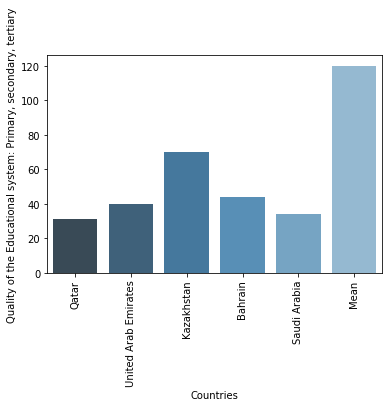

In [71]:
bar3 = sns.barplot(x = 'Countries', y = 'Quality of the Educational system: Primary, secondary, tertiary', data = comparison, palette = "Blues_d")
plt.setp(bar3.get_xticklabels(), rotation=90);

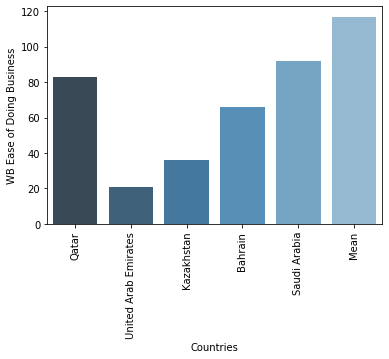

In [72]:
bar4 = sns.barplot(x = 'Countries', y = 'WB Ease of Doing Business', data = comparison, palette = "Blues_d")
plt.setp(bar4.get_xticklabels(), rotation=90);

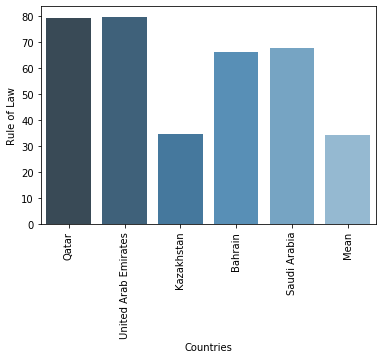

In [77]:
bar5 = sns.barplot(x = 'Countries', y = 'Government Effectiveness', data = comparison, palette = "Blues_d")
plt.setp(bar5.get_xticklabels(), rotation=90);

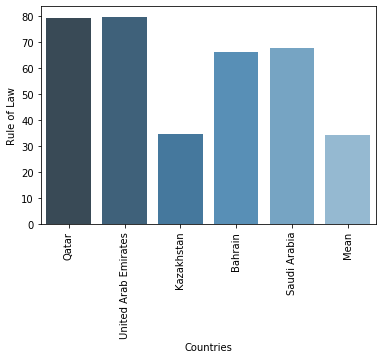

In [78]:
bar6 = sns.barplot(x = 'Countries', y = 'Rule of Law', data = comparison, palette = "Blues_d")
plt.setp(bar6.get_xticklabels(), rotation=90);

In the section below, we analyze the distribution and correlations of the GDP per capita in 2018. 

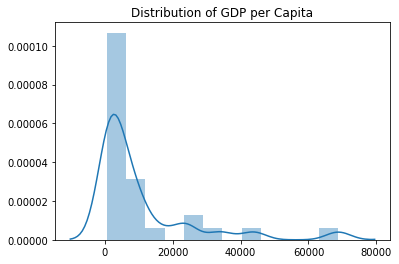

In [30]:
#Visualize the distribution of GDP per capita over the entire set. 

dist1 = sns.distplot(high_corr_df[['GDP per Capita (2018 USD)']]);
dist1.set_title('Distribution of GDP per Capita');

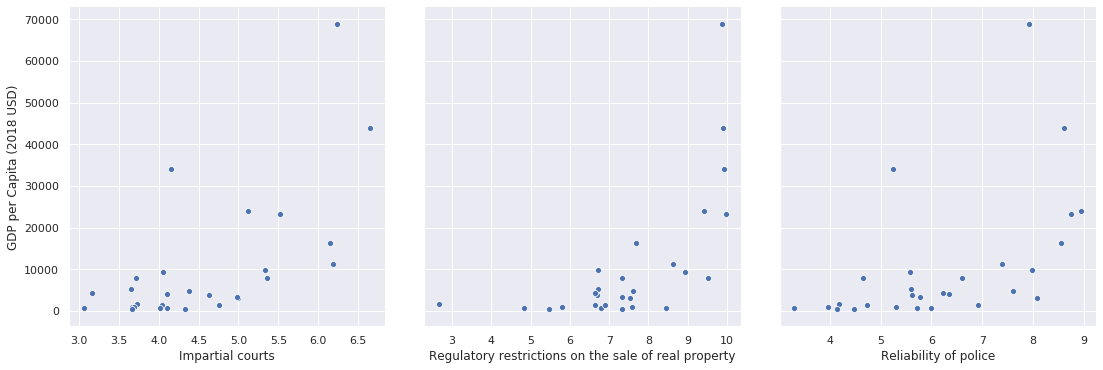

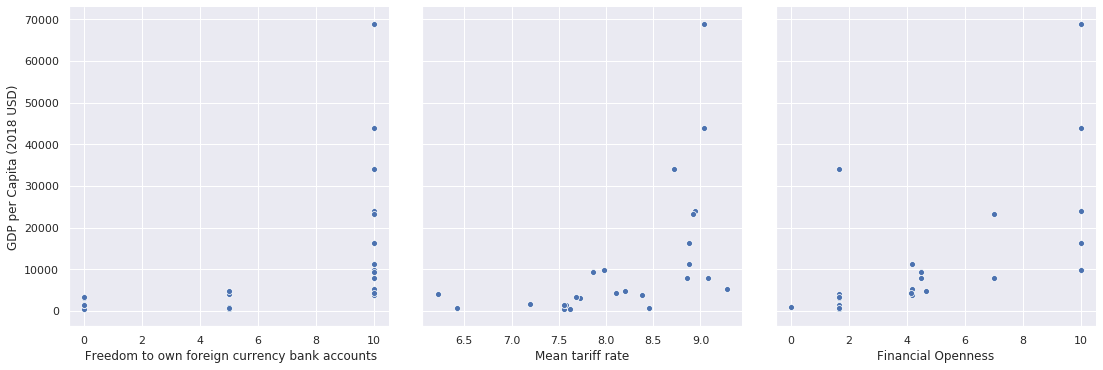

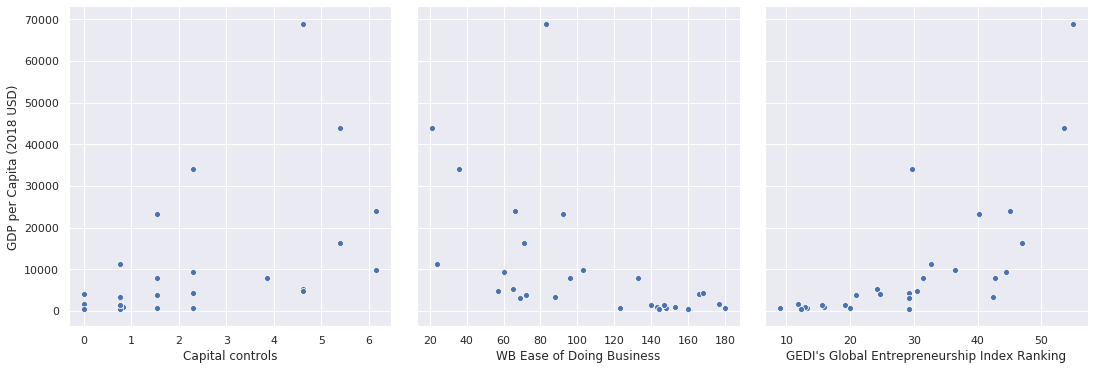

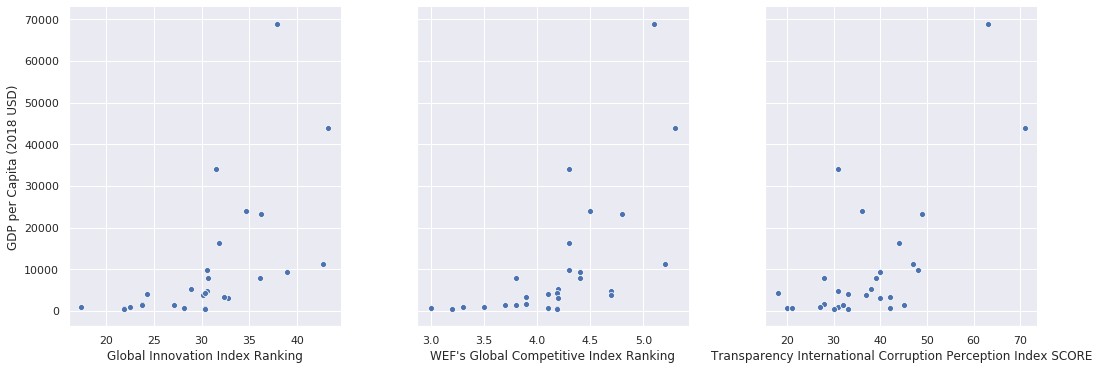

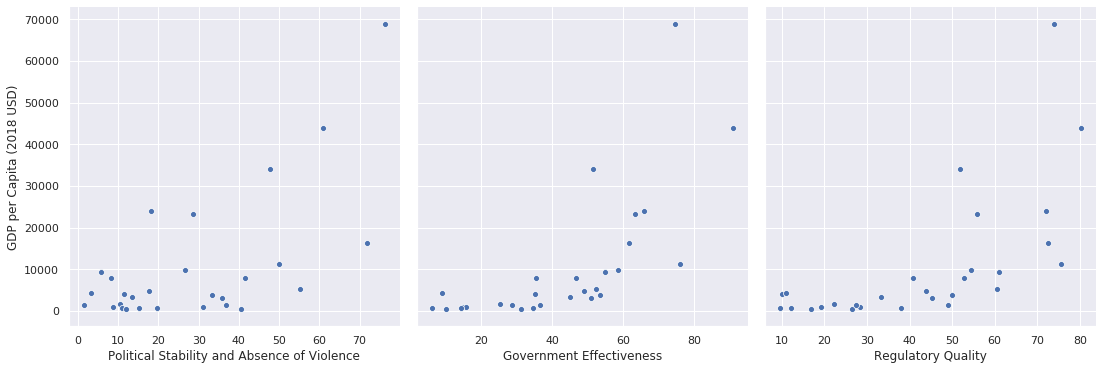

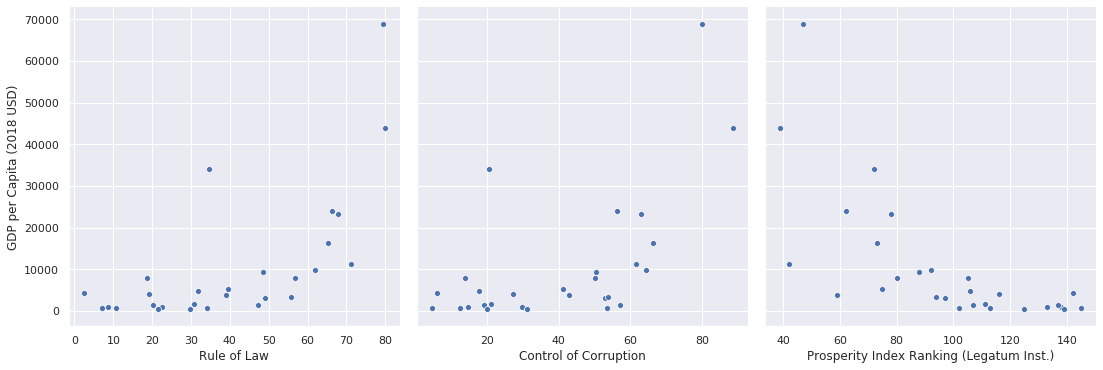

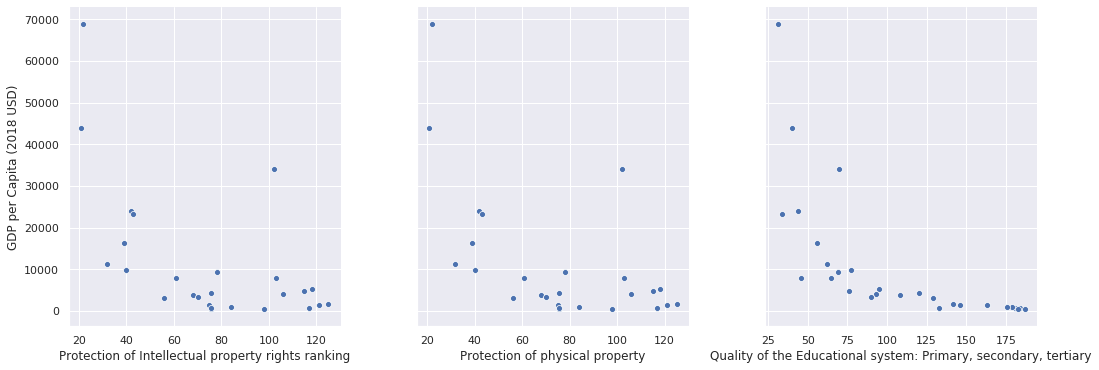

In [25]:
#Plot the variables above against the GDP per capita. 
#Double click on plot to zoom into each chart.

fig1 = sns.pairplot(data = high_corr_df,
                  y_vars=['GDP per Capita (2018 USD)'],
                  x_vars=high_corr_variables[:3], height = 5)
fig2 = sns.pairplot(data = high_corr_df,
                  y_vars=['GDP per Capita (2018 USD)'],
                  x_vars=high_corr_variables[3:6], height = 5)
fig3 = sns.pairplot(data = high_corr_df,
                  y_vars=['GDP per Capita (2018 USD)'],
                  x_vars=high_corr_variables[6:9], height = 5)
fig4 = sns.pairplot(data = high_corr_df,
                  y_vars=['GDP per Capita (2018 USD)'],
                  x_vars=high_corr_variables[9:12], height = 5)
fig5 = sns.pairplot(data = high_corr_df,
                  y_vars=['GDP per Capita (2018 USD)'],
                  x_vars=high_corr_variables[12:15], height = 5)
fig6 = sns.pairplot(data = high_corr_df,
                  y_vars=['GDP per Capita (2018 USD)'],
                  x_vars=high_corr_variables[15:18], height = 5)
fig7 = sns.pairplot(data = high_corr_df,
                  y_vars=['GDP per Capita (2018 USD)'],
                  x_vars=high_corr_variables[18:], height = 5)


### Next Steps: Use high_corr_df to perform regressions
For a smaller number of variables, consider the vertical_transpose dataframe.